## Exploratory data analysis: PCA and Mahalanobis distance analysis
**Author:** Y.X. Wu


In [159]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import math 
import matplotlib.cm as cm
import matplotlib as mpl

# display the current working directory
display("Current working directory: {0}".format(os.getcwd()))

data_path = '../Dataset_Cleaned/'
display(os.path.isfile(data_path+'Hardness_database_YW_v3.xlsx'))

### Import hardness dataset

In [160]:
# define an empty df with column head defined
df_compo = pd.DataFrame(columns=['Fe', 'Cr', 'Ni', 'Mo', 'W', 'N', 'Nb', 'C', 'Si', 'Mn',
       'Cu', 'Al', 'V', 'Ta', 'Ti', 'Co', 'Mg', 'Y', 'Zr', 'Hf'])
 
# import Hardness dataset
df_H = pd.read_excel(data_path + 'Hardness_database_YW_v3.xlsx', header=2)

display(df_H.columns)

# obtain the 2 inputs and 1 output from this dataset
df_H_compo  = pd.concat([df_compo, df_H[['Fe', 'Cr', 'Ni', 'Mo', 'W', 'N', 'Nb', 'C', 'Si', 'Mn',
       'Cu', 'Al', 'V', 'Ta', 'Ti', 'Co', 'Mg', 'Y', 'Zr', 'Hf']]], axis=0, ignore_index=True)
df_H_compo = df_H_compo.fillna(0) # fill in the nan by zero
display(df_H_compo.head(1))
 

Index(['Alloy ID', 'Fe', 'Cr', 'Ni', 'Mo', 'W', 'N', 'Nb', 'C', 'Si', 'Mn',
       'Cu', 'Al', 'V', 'Ta', 'Ti', 'Co', 'Mg', 'Y', 'Zr', 'Hf', 'delta_a',
       'Hmix', 'VEC', 'sigma_bulk_modulus', 'converted HV'],
      dtype='object')

,Fe,Cr,Ni,Mo,W,N,Nb,C,Si,Mn,Cu,Al,V,Ta,Ti,Co,Mg,Y,Zr,Hf
0,19.92,18.54,20.93,0.0,0.0,0,0.0,0.0,0.0,19.59,0.0,0.0,0.0,0.0,0.0,21.02,0,0.0,0.0,0.0


### Import corrosion dataset

In [161]:
# import corrosion dataset
df_C = pd.read_excel(data_path + 'Corrosion_database_YW_v3.xlsx', header=2)

# obtain the 2 inputs and 1 output from this dataset
df_C_compo  = pd.concat([df_compo, df_C[['Fe', 'Cr', 'Ni', 'Mo', 'W', 'N', 'Nb', 'C', 'Si', 'Mn',
       'Cu', 'Al', 'V', 'Ta', 'Ti', 'Co', 'Mg', 'Y']]], axis=0, ignore_index=True)
df_C_compo = df_C_compo.fillna(0) # fill in the nan by zero
print(df_C_compo.columns)

display(df_C_compo.head(1))

Index(['Fe', 'Cr', 'Ni', 'Mo', 'W', 'N', 'Nb', 'C', 'Si', 'Mn', 'Cu', 'Al',
       'V', 'Ta', 'Ti', 'Co', 'Mg', 'Y', 'Zr', 'Hf'],
      dtype='object')


,Fe,Cr,Ni,Mo,W,N,Nb,C,Si,Mn,Cu,Al,V,Ta,Ti,Co,Mg,Y,Zr,Hf
0,69.77,18.0,10.0,0.0,0.0,0.0,0.0,0.03,1.0,1.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0


### Import new dataset

In [162]:
df_new_KW131_wt = pd.read_excel(data_path + 'MultiTaskModel_corrosion_PT1_KW131_wt_pct.xlsx')
df_new_KW130_wt = pd.read_excel(data_path + 'MultiTaskModel_corrosion_PT1_KW130_wt_pct.xlsx')
df_new_KW99_wt  = pd.read_excel(data_path + 'MultiTaskModel_hardness_PT3_KW99_wt_pct.xlsx')

df_compo = pd.DataFrame(columns=['Fe', 'Cr', 'Ni', 'Mo', 'W', 'N', 'Nb', 'C', 'Si', 'Mn',
       'Cu', 'Al', 'V', 'Ta', 'Ti', 'Co', 'Mg', 'Y', 'Zr', 'Hf'])

df_compo_new_KW131 = pd.concat([df_compo, df_new_KW131_wt[['Fe', 'Cr', 'Ni', 'Mo', 'Ti']]], axis=0, ignore_index=True)
df_compo_new_KW130 = pd.concat([df_compo, df_new_KW130_wt[['Fe', 'Cr', 'Ni', 'Mo', 'Ti']]], axis=0, ignore_index=True)
df_compo_new_KW99  = pd.concat([df_compo, df_new_KW99_wt [['Fe', 'Cr', 'Ni', 'Co', 'V']]],  axis=0, ignore_index=True)

df_compo_new_KW131 = df_compo_new_KW131.fillna(0) # fill in the nan by zero
df_compo_new_KW130 = df_compo_new_KW130.fillna(0) # fill in the nan by zero
df_compo_new_KW99  = df_compo_new_KW99.fillna(0)  # fill in the nan by zero

  
print('----- KW131 -----') 
display(df_compo_new_KW131.head(1))

print('----- KW130 -----') 
display(df_compo_new_KW130.head(1))

print('----- KW99 -----') 
display(df_compo_new_KW99.head(1))


----- KW131 -----


,Fe,Cr,Ni,Mo,W,N,Nb,C,Si,Mn,Cu,Al,V,Ta,Ti,Co,Mg,Y,Zr,Hf
0,14.316994,35.210247,45.453038,4.138939,0,0,0,0,0,0,0,0,0,0,0.880782,0,0,0,0,0


----- KW130 -----


,Fe,Cr,Ni,Mo,W,N,Nb,C,Si,Mn,Cu,Al,V,Ta,Ti,Co,Mg,Y,Zr,Hf
0,14.100984,33.878661,46.947943,4.184328,0,0,0,0,0,0,0,0,0,0,0.888084,0,0,0,0,0


----- KW99 -----


,Fe,Cr,Ni,Mo,W,N,Nb,C,Si,Mn,Cu,Al,V,Ta,Ti,Co,Mg,Y,Zr,Hf
0,10.271486,31.290494,51.985556,0,0,0,0,0,0,0,0,0,1.601018,0,0,4.851446,0,0,0,0


### assign training vs new datasets

In [163]:
# ----- training dataset -----

# df_training = df_C_compo
# PT_name = 'corrosion_dataset'

df_training = df_H_compo
PT_name = 'hardness_dataset'


# ----- new dataset -----

df_new = df_compo_new_KW131
KW_name = 'KW131' 
vars_ele = ['Fe', 'Cr', 'Ni', 'Mo', 'Ti']

# df_new = df_compo_new_KW130
# KW_name = 'KW130' 
# vars_ele = ['Fe', 'Cr', 'Ni', 'Mo', 'Ti']

# df_new = df_compo_new_KW99
# KW_name = 'KW99' 
# vars_ele = ['Fe', 'Cr', 'Ni', 'Co', 'V']


### pairplot for training + new datasets

In [164]:
# concanacate both the training dataset and new dataset

df_training = df_training.assign(dataset='training')
display(df_training.tail(3), df_training.shape)
print('------------------------------------')


df_new = df_new.assign(dataset='new')
display(df_new.tail(3), df_training.shape)
print('------------------------------------')

df_highlight = df_new.iloc[[38]] # the wafer numbering will + 1
df_highlight.replace('new', 'highlight', inplace=True)
display(df_highlight.tail(1), df_highlight.shape)
print('------------------------------------')

df_conc = pd.concat([df_training, df_new, df_highlight], ignore_index=True)
display(df_conc.tail(3), df_conc.shape)
print('------------------------------------')


,Fe,Cr,Ni,Mo,W,N,Nb,C,Si,Mn,...,Al,V,Ta,Ti,Co,Mg,Y,Zr,Hf,dataset
677,24.77,23.06,26.03,0.00,0.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,26.14,0,0.0,0.0,0.0,training
678,21.72,20.23,22.83,0.00,0.0,0,0.0,0.0,0.0,0.0,...,10.5,0.0,0.0,0.0,0.00,0,0.0,0.0,0.0,training
679,20.17,0.00,42.40,6.93,0.0,0,0.0,0.0,0.0,0.0,...,0.0,9.2,0.0,0.0,21.29,0,0.0,0.0,0.0,training


(680, 21)

------------------------------------


,Fe,Cr,Ni,Mo,W,N,Nb,C,Si,Mn,...,Al,V,Ta,Ti,Co,Mg,Y,Zr,Hf,dataset
66,66.296083,4.432613,24.914375,2.416459,0,0,0,0,0,0,...,0,0,0,1.940470,0,0,0,0,0,new
67,65.324524,4.818151,24.401985,2.839441,0,0,0,0,0,0,...,0,0,0,2.615900,0,0,0,0,0,new
68,63.370312,5.076982,23.439965,4.034033,0,0,0,0,0,0,...,0,0,0,4.078709,0,0,0,0,0,new


(680, 21)

------------------------------------


/Users/ywu/opt/anaconda3/envs/tf-env/lib/python3.7/site-packages/pandas/core/frame.py:5244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


,Fe,Cr,Ni,Mo,W,N,Nb,C,Si,Mn,...,Al,V,Ta,Ti,Co,Mg,Y,Zr,Hf,dataset
38,35.00856,13.491011,28.41329,10.742321,0,0,0,0,0,0,...,0,0,0,12.344818,0,0,0,0,0,highlight


(1, 21)

------------------------------------


,Fe,Cr,Ni,Mo,W,N,Nb,C,Si,Mn,...,Al,V,Ta,Ti,Co,Mg,Y,Zr,Hf,dataset
747,65.324524,4.818151,24.401985,2.839441,0.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.615900,0.0,0,0.0,0.0,0.0,new
748,63.370312,5.076982,23.439965,4.034033,0.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,4.078709,0.0,0,0.0,0.0,0.0,new
749,35.008560,13.491011,28.413290,10.742321,0.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,12.344818,0.0,0,0.0,0.0,0.0,highlight


(750, 21)

------------------------------------


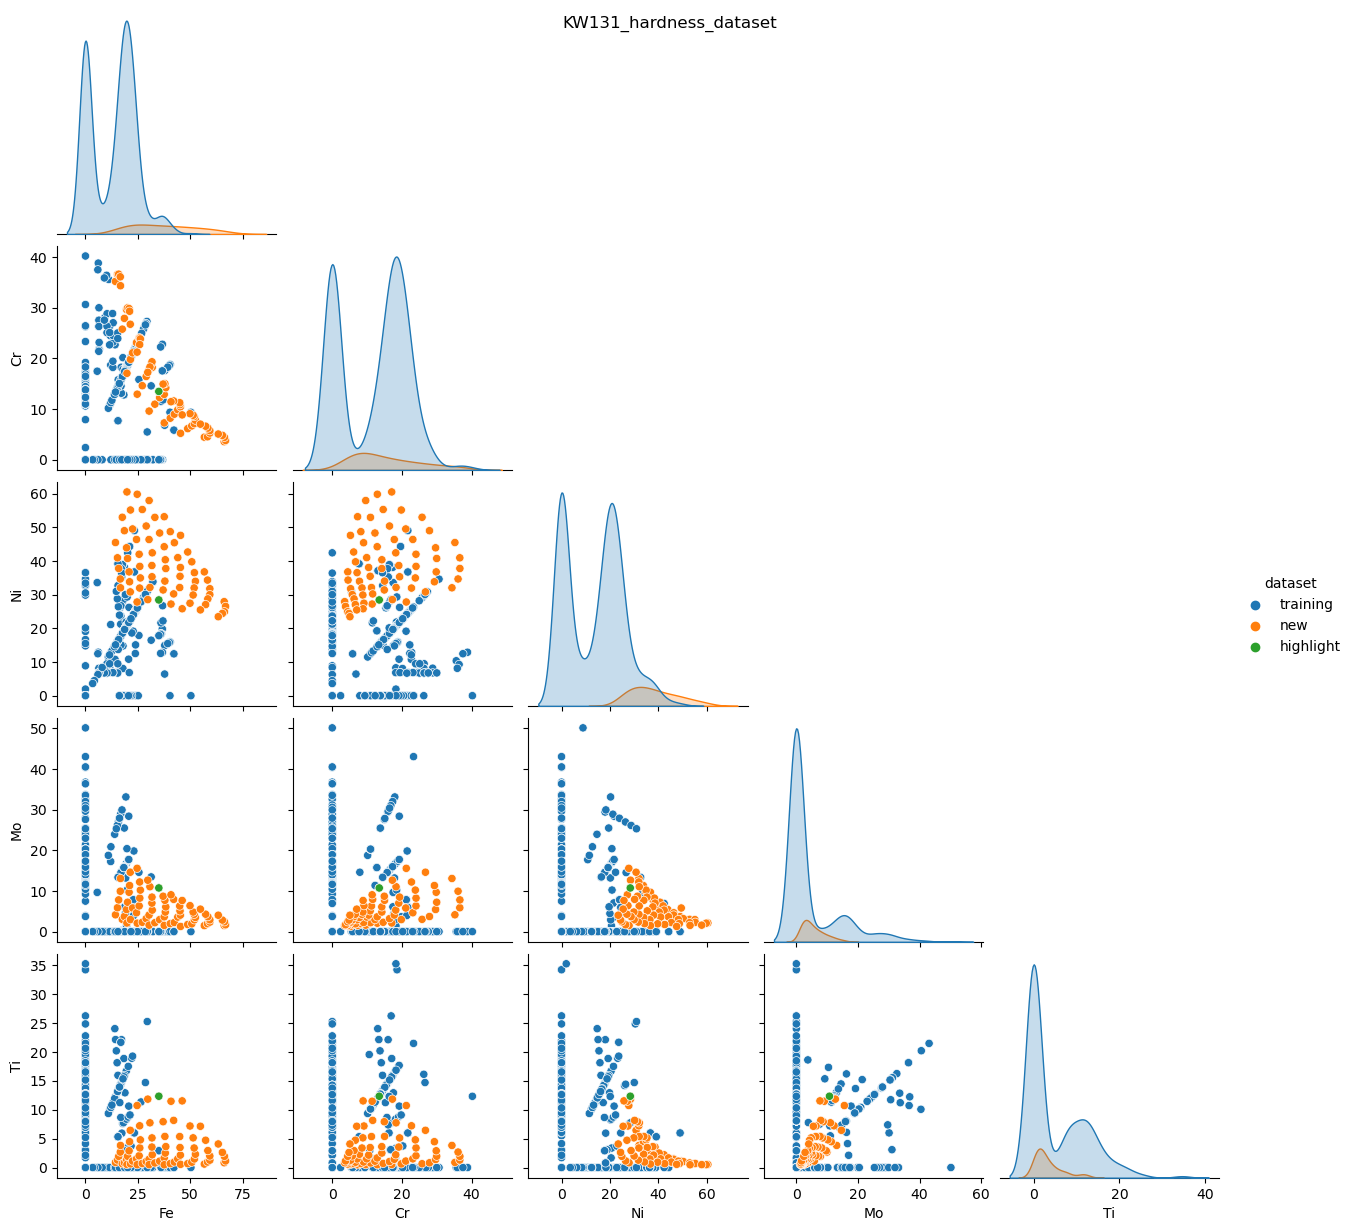

In [165]:
# g = sns.pairplot(df_conc, vars=['Fe', 'Cr', 'Ni', 'Mo', 'Ti'], hue="dataset", kind="scatter", corner=True)
g = sns.pairplot(df_conc, vars=vars_ele, hue="dataset", kind="scatter", corner=True)
sns.diverging_palette(220, 20, as_cmap=True)
g.fig.suptitle(KW_name+'_'+PT_name)

plt.savefig(KW_name+'_'+PT_name+'_pairplot_TrainingData+NewData.png', bbox_inches='tight')
plt.show()

### Now let's try PCA
https://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_vs_lda.html#sphx-glr-auto-examples-decomposition-plot-pca-vs-lda-py

In [166]:
# from sklearn import datasets
from sklearn.decomposition import PCA
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# assign training data to be 0
df_training_pca = df_training.assign(dataset = 0)
display(df_training_pca.head(3))
print('------------------------------------')

# assign new data to be 1
df_new_pca = df_new.assign(dataset=1)
display(df_new_pca.head(3))
print('------------------------------------')

# concatenate training + new
df_conc_pca = pd.concat([df_training_pca, df_new_pca], ignore_index = False) # why `ignore_index = False`?
# df_conc_pca = df_conc_pca.fillna(0) # fill in the nan by zero
display(df_conc_pca.head(1), df_conc_pca.tail(1))
print('------------------------------------')

# partition the concatenated table and ready for PCA
X_conc = df_conc_pca.loc[:, df_conc_pca.columns != 'dataset'].to_numpy(dtype=float)
y_conc = df_conc_pca['dataset'].to_numpy(dtype=float)
dataset_names = np.array(['training', 'new'])

index_conc = df_conc_pca.index.values + 1 # this is index for each composition


,Fe,Cr,Ni,Mo,W,N,Nb,C,Si,Mn,...,Al,V,Ta,Ti,Co,Mg,Y,Zr,Hf,dataset
0,19.92,18.54,20.93,0.0,0.0,0,0.0,0.0,0.0,19.59,...,0.00,0.00,0.0,0.0,21.02,0,0.0,0.0,0.0,0
1,22.12,20.60,23.25,0.0,0.0,0,0.0,0.0,0.0,0.00,...,10.69,0.00,0.0,0.0,23.34,0,0.0,0.0,0.0,0
2,16.85,15.69,17.71,0.0,0.0,0,0.0,0.0,0.0,16.58,...,0.00,15.37,0.0,0.0,17.79,0,0.0,0.0,0.0,0


------------------------------------


,Fe,Cr,Ni,Mo,W,N,Nb,C,Si,Mn,...,Al,V,Ta,Ti,Co,Mg,Y,Zr,Hf,dataset
0,14.316994,35.210247,45.453038,4.138939,0,0,0,0,0,0,...,0,0,0,0.880782,0,0,0,0,0,1
1,15.278911,36.620145,40.922557,5.876322,0,0,0,0,0,0,...,0,0,0,1.302065,0,0,0,0,0,1
2,15.859740,36.643216,37.761748,7.803950,0,0,0,0,0,0,...,0,0,0,1.931346,0,0,0,0,0,1


------------------------------------


,Fe,Cr,Ni,Mo,W,N,Nb,C,Si,Mn,...,Al,V,Ta,Ti,Co,Mg,Y,Zr,Hf,dataset
0,19.92,18.54,20.93,0.0,0.0,0,0.0,0.0,0.0,19.59,...,0.0,0.0,0.0,0.0,21.02,0,0.0,0.0,0.0,0


,Fe,Cr,Ni,Mo,W,N,Nb,C,Si,Mn,...,Al,V,Ta,Ti,Co,Mg,Y,Zr,Hf,dataset
68,63.370312,5.076982,23.439965,4.034033,0.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,4.078709,0.0,0,0.0,0.0,0.0,1


------------------------------------


### 2D PCA 

In [167]:
# 2D PCA
pca = PCA(n_components=2)
X_conc_r = pca.fit(X_conc).transform(X_conc)

print(
    "explained variance ratio (first two components): %s"
    % str(pca.explained_variance_ratio_)
)
# why I didn't try 3D because the explained_variance_ratio_ on the third axis is low: 
# The explained variance score explains the dispersion of errors of a given dataset, 
# and the formula is written as follows: Here, and Var(y) is the variance of prediction errors 
# and actual values respectively. Scores close to 1.0 are highly desired, indicating better squares 
# of standard deviations of errors.


explained variance ratio (first two components): [0.41684099 0.10807393]


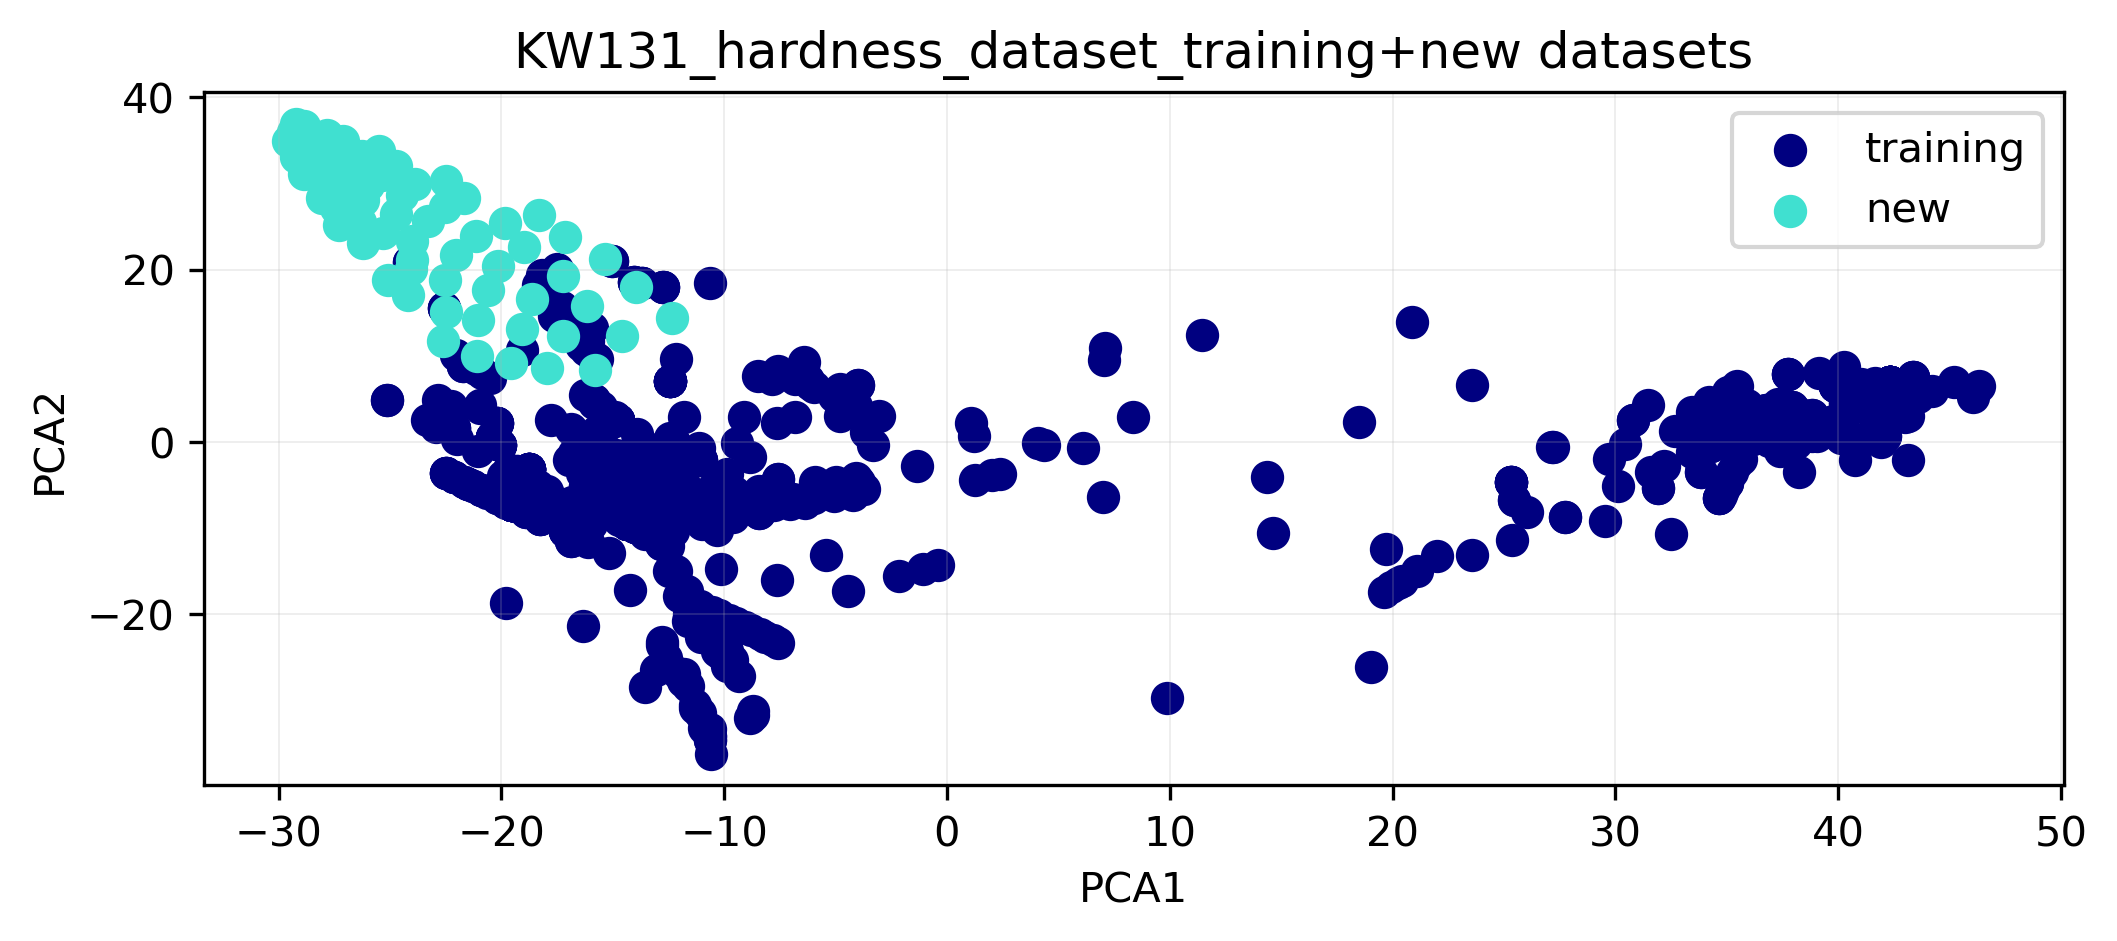

In [168]:
# plot the projection of PCA analysis
figure(figsize=(8, 3), dpi=300)
colors = ["navy", "turquoise"]
lw = 2

for color, i, dataset_name in zip(colors, [0, 1], dataset_names):
    plt.scatter(
        X_conc_r[y_conc == i, 0], X_conc_r[y_conc == i, 1], color=color, alpha=1, lw=lw, label=dataset_name
    )

# for i, txt in enumerate(index_conc):
#     if y_conc[i] == 1:
#         plt.annotate(txt, (X_conc_r[i, 0], X_conc_r[i, 1]), color="maroon", alpha=0.5)

plt.grid(linewidth = 0.1)
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title(KW_name+'_'+PT_name+'_training+new datasets')
plt.savefig(KW_name+'_'+PT_name+'_2D PCA_training+new.png', bbox_inches='tight')
plt.show()



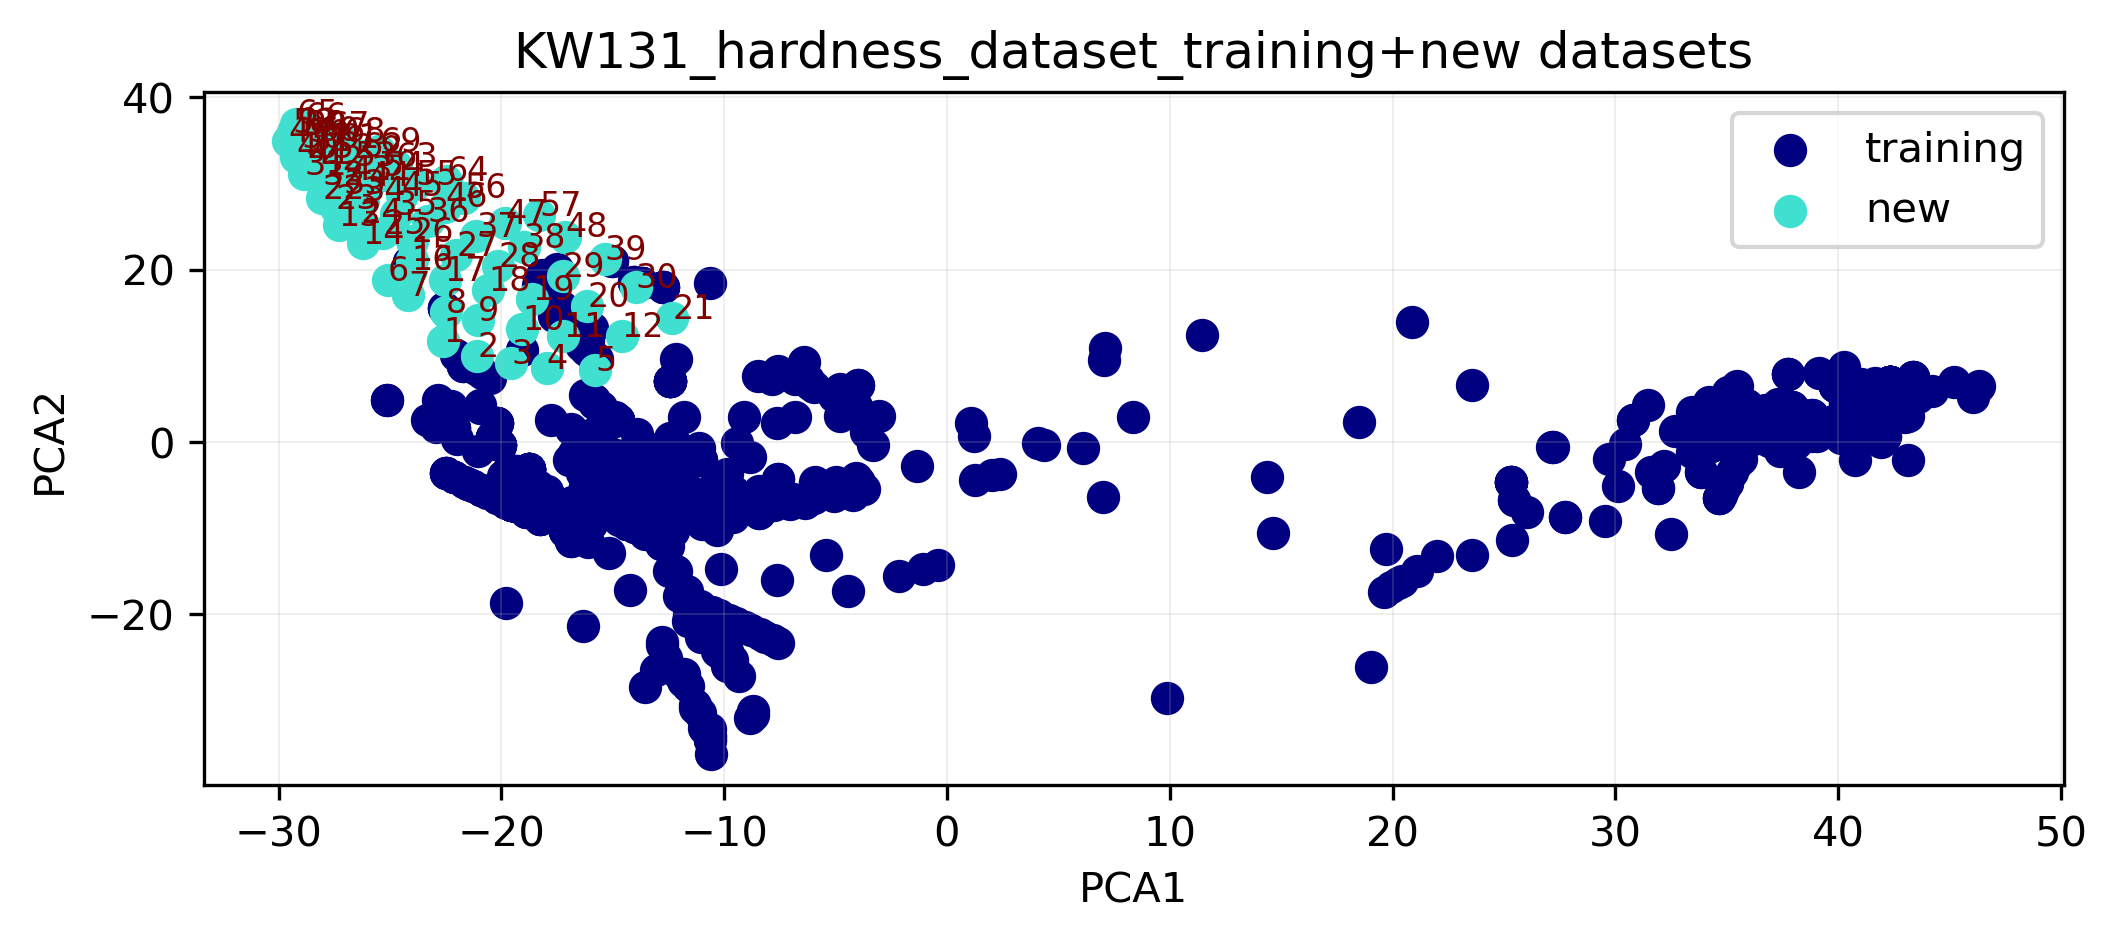

In [169]:
# plot again with zoom in
figure(figsize=(8, 3), dpi=300)

colors = ["navy", "turquoise"]
lw = 2

for color, i, dataset_name in zip(colors, [0, 1], dataset_names):
    plt.scatter(
        X_conc_r[y_conc == i, 0], X_conc_r[y_conc == i, 1], color=color, alpha=1, lw=lw, label=dataset_name
    )

for i, txt in enumerate(index_conc):
    if y_conc[i] == 1:
        plt.annotate(txt, (X_conc_r[i, 0], X_conc_r[i, 1]), color="maroon", alpha=1, fontsize=8)

plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title(KW_name+'_'+PT_name+'_training+new datasets')

if PT_name == 'corrosion_PT1':
    plt.xlim([-30, 20])
    plt.ylim([-10, 60])
if PT_name == 'hardness_PT3':
    plt.xlim([10, 50])
    plt.ylim([-10, 15])
 
plt.grid(linewidth = 0.1)
# plt.savefig(KW_name+'_'+PT_name+'_2D PCA_training+new_zoomin.png', bbox_inches='tight')
plt.show()


## Let's try to use the concept of outlier/novelty detection (e.g. using Mahalanobis distance)
https://scikit-learn.org/stable/modules/outlier_detection.html

### Approach 1. Multivariate Outliers and Mahalanobis Distance (simple approach)
https://www.geeksforgeeks.org/how-to-calculate-mahalanobis-distance-in-python/
https://www.machinelearningplus.com/statistics/mahalanobis-distance/ 

In [170]:
import scipy.stats as stats
from scipy.stats import chi2

# calculateMahalanobis Function to calculate
# the Mahalanobis distance of each point to the "center" of the dataset 
def calculateMahalanobis(y=None, data=None, cov=None):
    # Compute the Mahalanobis Distance between each row of y and the data  
    # y    : matrix of data with, say, p columns (new observation).
    # data : ndarray of the distribution (existing data), from which Mahalanobis distance of each observation of y is to be computed.
    # cov  : covariance matrix (p x p) of the distribution(existing data). If None, will be computed from data.
   
    y_mu = y - np.mean(data)
    if not cov:
        cov = np.cov(data.values.T)
    inv_covmat = np.linalg.inv(cov)
    left = np.dot(y_mu, inv_covmat)
    mahal = np.dot(left, y_mu.T)
    return mahal.diagonal()


In [171]:
# prepare the df for calculating Mahalanobis distance (cannot have string in df)

# double check our training+testing dataset
display(df_training_pca.shape, df_training_pca.head(1))
display(df_new_pca.shape,      df_new_pca.head(1))
display(df_conc_pca.shape,     df_conc_pca.head(1), df_conc_pca.tail(1))

# only the "training" data (WITHOUT "new" data)
df_training_num   = df_training_pca.loc[:, df_training_pca.columns != 'dataset']
df_training_label = df_training_pca[['dataset']]

# only the "new" data 
df_new_num   = df_new_pca.loc[:, df_new_pca.columns != 'dataset']
df_new_label = df_new_pca[['dataset']]
 
# both the "training" data + "new" data
df_conc_num   = df_conc_pca.loc[:, df_conc_pca.columns != 'dataset']
df_conc_label = df_conc_pca[['dataset']]

print(df_conc_num.columns)
print(df_conc_label.columns)


(680, 21)

,Fe,Cr,Ni,Mo,W,N,Nb,C,Si,Mn,...,Al,V,Ta,Ti,Co,Mg,Y,Zr,Hf,dataset
0,19.92,18.54,20.93,0.0,0.0,0,0.0,0.0,0.0,19.59,...,0.0,0.0,0.0,0.0,21.02,0,0.0,0.0,0.0,0


(69, 21)

,Fe,Cr,Ni,Mo,W,N,Nb,C,Si,Mn,...,Al,V,Ta,Ti,Co,Mg,Y,Zr,Hf,dataset
0,14.316994,35.210247,45.453038,4.138939,0,0,0,0,0,0,...,0,0,0,0.880782,0,0,0,0,0,1


(749, 21)

,Fe,Cr,Ni,Mo,W,N,Nb,C,Si,Mn,...,Al,V,Ta,Ti,Co,Mg,Y,Zr,Hf,dataset
0,19.92,18.54,20.93,0.0,0.0,0,0.0,0.0,0.0,19.59,...,0.0,0.0,0.0,0.0,21.02,0,0.0,0.0,0.0,0


,Fe,Cr,Ni,Mo,W,N,Nb,C,Si,Mn,...,Al,V,Ta,Ti,Co,Mg,Y,Zr,Hf,dataset
68,63.370312,5.076982,23.439965,4.034033,0.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,4.078709,0.0,0,0.0,0.0,0.0,1


Index(['Fe', 'Cr', 'Ni', 'Mo', 'W', 'N', 'Nb', 'C', 'Si', 'Mn', 'Cu', 'Al',
       'V', 'Ta', 'Ti', 'Co', 'Mg', 'Y', 'Zr', 'Hf'],
      dtype='object')
Index(['dataset'], dtype='object')


### drop the zero_columns

In [172]:

# Create an empty list to store the names of the columns containing only zeros
zero_columns = []

# Iterate over each column in the dataframe
for column in df_conc_num.columns:
    # Check if every value in the column is equal to zero
    if (df_conc_num[column] == 0).all():
        # If every value in the column is zero, add the column name to the list
        zero_columns.append(column)

# Print the names of the columns containing only zeros
print(zero_columns)


df_training_num.drop(zero_columns, axis=1, inplace=True)
df_new_num.drop(zero_columns, axis=1, inplace=True)
df_conc_num.drop(zero_columns, axis=1, inplace=True)

# df_training_num.to_excel("checkcheck.xlsx")  
display(df_training_num.head(1))


['N', 'Mg']


/Users/ywu/opt/anaconda3/envs/tf-env/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Fe,Cr,Ni,Mo,W,Nb,C,Si,Mn,Cu,Al,V,Ta,Ti,Co,Y,Zr,Hf
0,19.92,18.54,20.93,0.0,0.0,0.0,0.0,0.0,19.59,0.0,0.0,0.0,0.0,0.0,21.02,0.0,0.0,0.0


### Now let's try two different ways to evaluate the Mahalanobis distance: 
1. - y: the "new" data 
   - data: "traininng" data
   - this will generate Mahalanobis distance only for the "new" data
   - effectively characterise the distance of "new" data to the center of the existing "training" data

In [173]:
# Creating a new column in the dataframe that holds
# the Mahalanobis distance for each row
df_new_num_Mahal = df_new_num.copy()



df_new_num_Mahal['Mahalanobis'] = calculateMahalanobis(
    y   = df_new_num, 
    data= df_training_num)



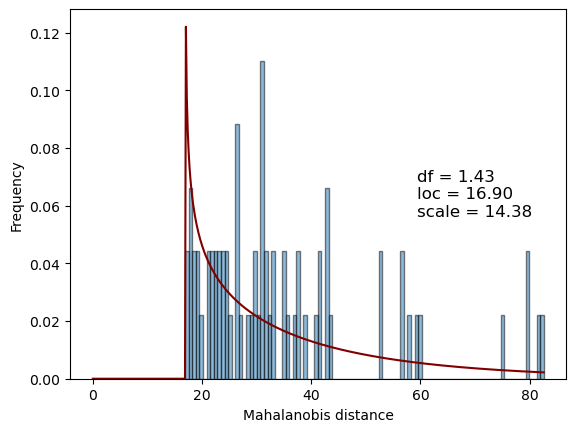

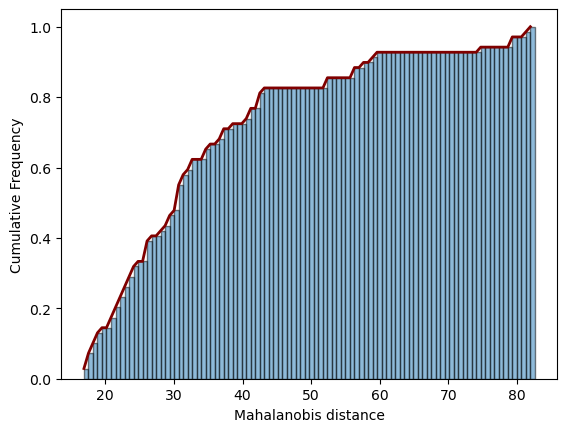

In [174]:
# -------------------------------------------------------------------- 
# here plot the Mahalanobis distance histogram
plt.hist(df_new_num_Mahal['Mahalanobis'], bins=100, edgecolor='black', alpha=0.5, density=True)
plt.xlabel('Mahalanobis distance')
plt.ylabel('Frequency')
# plt.show()
 
# Fit a chi-squared distribution to the data
df, loc, scale = stats.chi2.fit(df_new_num_Mahal['Mahalanobis'])

# Plot the fitted distribution over the histogram
x_chi2 = np.linspace(0, np.amax(df_new_num_Mahal['Mahalanobis']), 500)
pdf_chi2 = stats.chi2.pdf(x_chi2, df=df, loc=loc, scale=scale)
plt.plot(x_chi2, pdf_chi2, 'maroon')

# Add the fitted values to the plot
plt.text(0.7, 0.5, f"df = {df:.2f}\nloc = {loc:.2f}\nscale = {scale:.2f}",
         transform=plt.gca().transAxes, ha='left', va='center', fontsize=12)
# Show the plot
plt.show()
# -------------------------------------------------------------------- 


# -------------------------------------------------------------------- 
# Plot the histogram
counts, bins, patches = plt.hist(df_new_num_Mahal['Mahalanobis'], 
                                 bins=100, edgecolor='black', alpha=0.5, 
                                 cumulative=True, density=True)
# Plot the CDF
plt.plot(bins[:-1], counts, 'maroon', lw=2)
plt.xlabel('Mahalanobis distance')
plt.ylabel('Cumulative Frequency')
# plt.xlim(0, 100)
plt.show()
# -------------------------------------------------------------------- 




2. - y: the "concanacate" data 
   - data: also the "concanacate" data 
   - this will generate Mahalanobis distance for all the "training+new"
   - we can see all the data points: the "similarity" level all together
   - we will map this "similarity" back to the PCA 2D projection

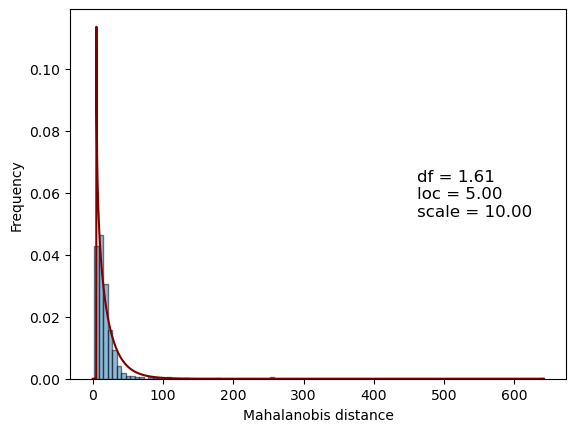

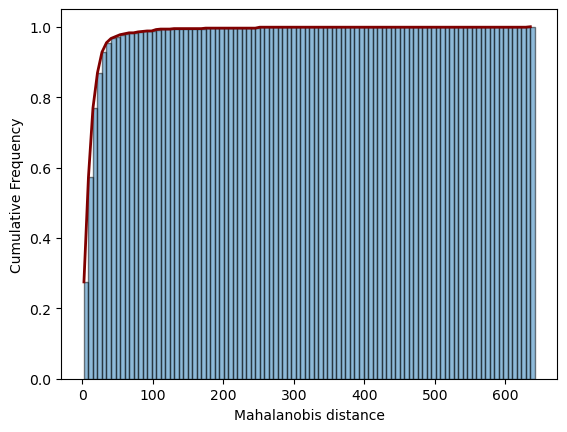

In [175]:
# Creating a new column in the dataframe that holds
# the Mahalanobis distance for each row
df_conc_num_Mahal = df_conc_num.copy()
df_conc_num_Mahal['Mahalanobis'] = calculateMahalanobis(
    y   = df_conc_num, 
    data= df_conc_num)

# -------------------------------------------------------------------- 
# here plot the Mahalanobis distance histogram
plt.hist(df_conc_num_Mahal['Mahalanobis'], bins=100, edgecolor='black', alpha=0.5, density=True)
plt.xlabel('Mahalanobis distance')
plt.ylabel('Frequency')
# plt.show()
 
# Fit a chi-squared distribution to the data
df, loc, scale = stats.chi2.fit(df_conc_num_Mahal['Mahalanobis'],floc=5, fscale=10)

# Plot the fitted distribution over the histogram
x_chi2 = np.linspace(0, np.amax(df_conc_num_Mahal['Mahalanobis']), 2000)
pdf_chi2 = stats.chi2.pdf(x_chi2, df=df, loc=loc, scale=scale)
plt.plot(x_chi2, pdf_chi2, 'maroon')

# Add the fitted values to the plot
plt.text(0.7, 0.5, f"df = {df:.2f}\nloc = {loc:.2f}\nscale = {scale:.2f}",
         transform=plt.gca().transAxes, ha='left', va='center', fontsize=12)
# plt.xlim(0, 100)
plt.show()
# -------------------------------------------------------------------- 


# -------------------------------------------------------------------- 
# Plot the histogram
counts, bins, patches = plt.hist(df_conc_num_Mahal['Mahalanobis'], 
                                 bins=100, edgecolor='black', alpha=0.5, 
                                 cumulative=True, density=True)
# Plot the CDF
plt.plot(bins[:-1], counts, 'maroon', lw=2)
plt.xlabel('Mahalanobis distance')
plt.ylabel('Cumulative Frequency')
# plt.xlim(0, 100)
plt.show()
# -------------------------------------------------------------------- 

3. let's try chi2 statistics to get a more presentable number: p-value based on chi2 distribution with degree of freedom = 2
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4381501/

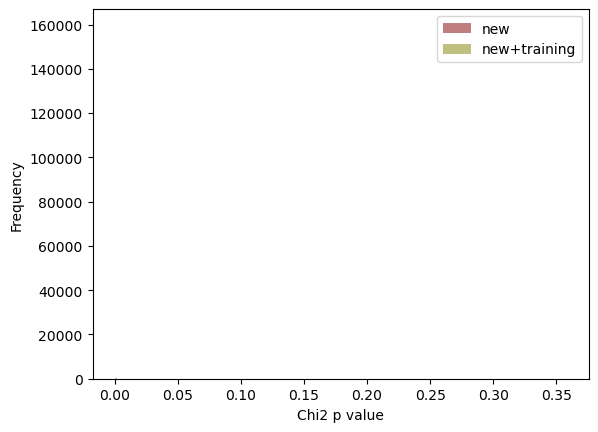

In [176]:
# calculate p-value for each mahalanobis distance using 
df_new_num_Mahal['p value'] = 1 - chi2.cdf(df_new_num_Mahal['Mahalanobis'], 2)
df_conc_num_Mahal['p value'] = 1 - chi2.cdf(df_conc_num_Mahal['Mahalanobis'], 2)
# Generally, the observation having a p-value less than 0.001 is assumed to be an outlier. 

# a quick look of the chi2 p value distribution
plt.hist(df_new_num_Mahal['p value'], bins=50, color='maroon', alpha=0.5, density=True, label='new')
plt.hist(df_conc_num_Mahal['p value'], bins=200, color='olive', alpha=0.5, density=True, label='new+training')
plt.xlabel('Chi2 p value')
plt.ylabel('Frequency')
plt.legend()
plt.show()
 

In [177]:
# now re-attach the label
df_new_Mahal  = pd.concat([df_new_num_Mahal,  df_new_label], axis=1)
df_conc_Mahal = pd.concat([df_conc_num_Mahal, df_conc_label], axis=1)
print(df_new_Mahal.tail(3))

# "df_conc_Mahal" is from method 2 to evalute the Mahalanobis distance when including all data
# only select the "new" dataset from the overall "training+new"
df_conc_Mahal_new = df_conc_Mahal[df_conc_Mahal["dataset"]== 1 ]
print(df_conc_Mahal_new.tail(3))


           Fe        Cr         Ni        Mo  W  Nb  C  Si  Mn  Cu  ...  V  \
66  66.296083  4.432613  24.914375  2.416459  0   0  0   0   0   0  ...  0   
67  65.324524  4.818151  24.401985  2.839441  0   0  0   0   0   0  ...  0   
68  63.370312  5.076982  23.439965  4.034033  0   0  0   0   0   0  ...  0   

    Ta        Ti  Co  Y  Zr  Hf  Mahalanobis  p value  dataset  
66   0  1.940470   0  0   0   0    81.877694      0.0        1  
67   0  2.615900   0  0   0   0    79.408629      0.0        1  
68   0  4.078709   0  0   0   0    74.861103      0.0        1  

[3 rows x 21 columns]
           Fe        Cr         Ni        Mo    W   Nb    C   Si   Mn   Cu  \
66  66.296083  4.432613  24.914375  2.416459  0.0  0.0  0.0  0.0  0.0  0.0   
67  65.324524  4.818151  24.401985  2.839441  0.0  0.0  0.0  0.0  0.0  0.0   
68  63.370312  5.076982  23.439965  4.034033  0.0  0.0  0.0  0.0  0.0  0.0   

    ...    V   Ta        Ti   Co    Y   Zr   Hf  Mahalanobis       p value  \
66  ...  0.0 

### If we believe the p value from chi2 statistics can be a measure of "novelty" (smaller ones are more likely outliers), we plot it back to PCA 2D project and also wafer representation

1. map the chi2 pvalues to the PCA 2D projection: it seems the variation of p value is NOT monotonic on this 2D projection 
I mainly highlighted the "new" dataset (you can still see the translucent "training" data points)

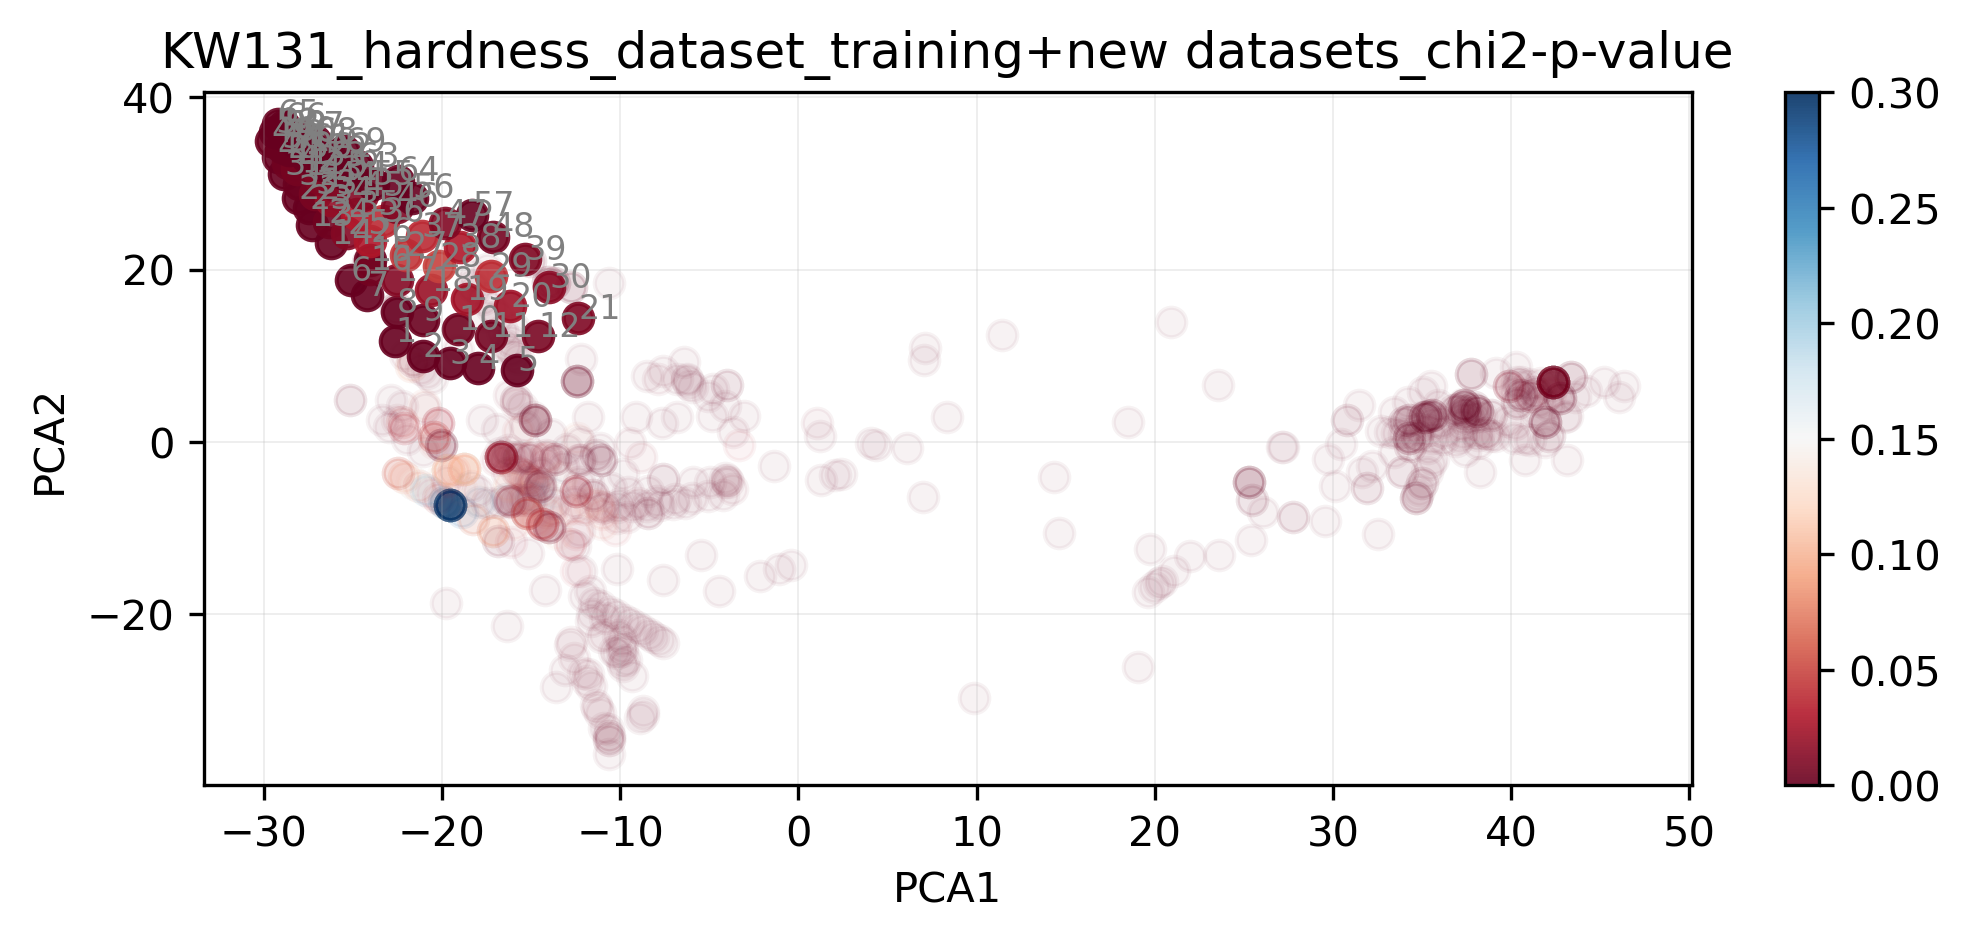

In [178]:
# plot the projection of PCA analysis
figure(figsize=(8, 3), dpi=300)
# colors = ["navy", "turquoise"]
# lw = 2
z_df_conc_Mahal = df_conc_Mahal["p value"].to_numpy(dtype=float)

for i, value in enumerate(df_conc_Mahal["dataset"].values):
    if value == 0: # means the training data
        plt.scatter(X_conc_r[i,0], X_conc_r[i,1], c=z_df_conc_Mahal[i], s=200, marker='.', alpha=0.05, cmap='RdBu',vmin=0, vmax=0.3)
    if value == 1: # means the new data
        plt.scatter(X_conc_r[i,0], X_conc_r[i,1], c=z_df_conc_Mahal[i], s=200, marker='.', alpha=0.9, cmap='RdBu',vmin=0, vmax=0.3)
        plt.annotate(index_conc[i], (X_conc_r[i, 0], X_conc_r[i, 1]), color="grey", alpha=1, fontsize=8)
        
if PT_name == 'corrosion_PT1':
    plt.xlim([-30, 20])
    plt.ylim([-10, 60])
if PT_name == 'hardness_PT3':
    plt.xlim([10, 50])
    plt.ylim([-10, 15])
 
plt.grid(linewidth = 0.1)
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.colorbar()
plt.title(KW_name+'_'+PT_name+'_training+new datasets_chi2-p-value')
# plt.savefig(KW_name+'_'+PT_name+'_2D PCA_training+new_zoomin_pValue.png', bbox_inches='tight')
plt.show()
 

Now I will plot the p value on the wafer 

In [179]:
# load the wafer-coordinates
PVD_x_y = pd.read_excel(data_path + 'PVD_x_y.xlsx');

coord_x = PVD_x_y["x"].to_numpy(dtype=float)
coord_y = PVD_x_y["y"].to_numpy(dtype=float)

z_KW_conc_Mahal_new = df_conc_Mahal_new["p value"].to_numpy(dtype=float)
z_KW_new_Mahal      = df_new_Mahal["p value"].to_numpy(dtype=float)
 
# prepare as the labels: 1-69
index_conc_Mahal_new = df_conc_Mahal_new.index.values + 1
 


I will also fix the level of color contours: because maybe the rational way here when selecting compositions is selecting a few ranges: close->intermediate->far from the center of the data group

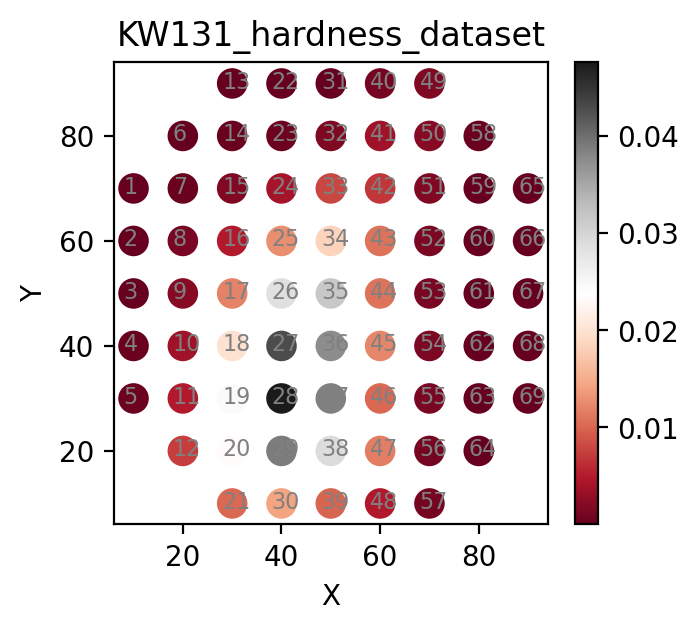

In [180]:
# Create the scatter contour plot BEFORE regulation

figure(figsize=(3.5, 3), dpi=200)
cax1 = plt.scatter(coord_x, coord_y, c=z_KW_conc_Mahal_new, s=400, marker='.', cmap='RdGy') # ,vmin=0.2, vmax=0.6 RdBu/RdGy
plt.xlabel('X')
plt.ylabel('Y')
plt.title(KW_name+'_'+PT_name)

for i, txt in enumerate(index_conc_Mahal_new):
    plt.annotate(txt, (coord_x[i]-2, coord_y[i]-1), color="grey", alpha=1, fontsize=8)

plt.colorbar(cax1)
plt.savefig(KW_name+'_'+PT_name+'_Mahalanobis_pValue.png', bbox_inches='tight')
plt.show()


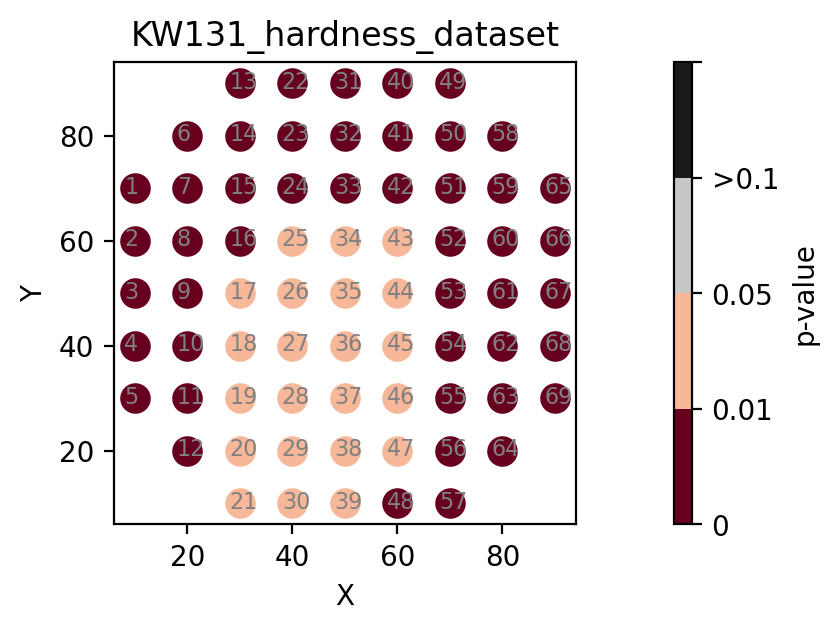

In [181]:
# Create the scatter contour plot AFTER regulation

fig, (ax1, ax2) = plt.subplots(figsize = (4, 3),
                          ncols = 2, gridspec_kw={'width_ratios': [3, 0.1]}, dpi=200)

# plot the fixed intervals 
cmap = cm.RdGy(np.linspace(0, 1, 4))  # RdBu/RdGy
 
c_0_01     = [i for i,v in enumerate(z_KW_conc_Mahal_new) if v < 0.01]
c_0_05    = [i for i,v in enumerate(z_KW_conc_Mahal_new) if v < 0.05 and v >= 0.01]
c_0_1     = [i for i,v in enumerate(z_KW_conc_Mahal_new) if v < 0.1  and v >= 0.05]
c_abv_0_1 = [i for i,v in enumerate(z_KW_conc_Mahal_new) if              v >= 0.1]

cax1 = ax1.scatter(coord_x[c_0_01],    coord_y[c_0_01],    color=cmap[0], s=400, marker='.') # ,vmin=0.2, vmax=0.6
cax2 = ax1.scatter(coord_x[c_0_05],    coord_y[c_0_05],    color=cmap[1], s=400, marker='.') # ,vmin=0.2, vmax=0.6
cax3 = ax1.scatter(coord_x[c_0_1],     coord_y[c_0_1],     color=cmap[2], s=400, marker='.') # ,vmin=0.2, vmax=0.6
cax4 = ax1.scatter(coord_x[c_abv_0_1], coord_y[c_abv_0_1], color=cmap[3], s=400, marker='.') # ,vmin=0.2, vmax=0.6

ax1.set_aspect('equal', 'box')
for i, txt in enumerate(index_conc_Mahal_new):
    ax1.annotate(txt, (coord_x[i]-2, coord_y[i]-1), color="grey", alpha=1, fontsize=8)
 
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_title(KW_name+'_'+PT_name) 


# customised colorbar: https://matplotlib.org/stable/tutorials/colors/colorbar_only.html

cmap = mpl.cm.RdGy  #RdBu/RdGy
bounds = [0, 1, 2, 3, 4]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
             cax=ax2, orientation='vertical',  
             label="p-value")
cbar.ax.set_yticklabels(['0','0.01','0.05','>0.1',''])

  
plt.savefig(KW_name+'_'+PT_name+'_Mahalanobis_pValue_reg.png', bbox_inches='tight')
plt.show()

let's also plot the Mahalanobis distance to "center" of the data (only use the training data)

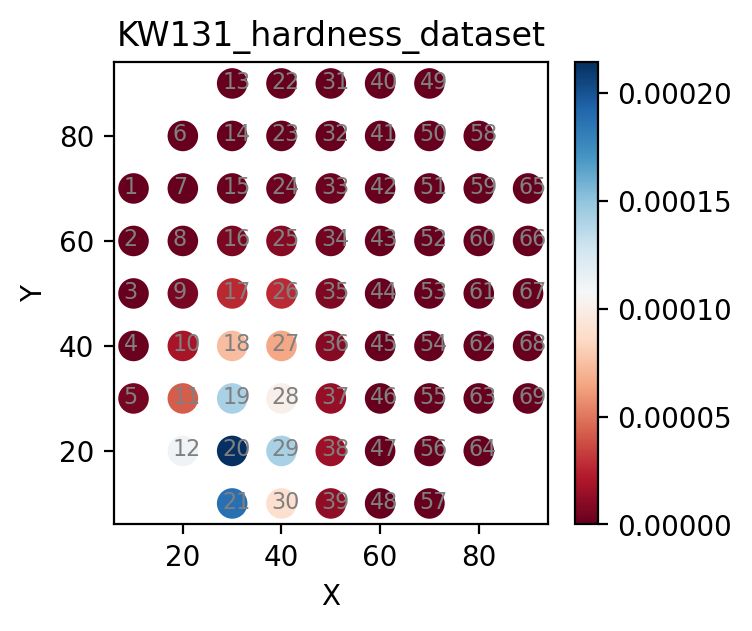

In [182]:
# Create the scatter contour plot BEFORE regulation
figure(figsize=(3.5, 3), dpi=200)
cax1 = plt.scatter(coord_x, coord_y, c=z_KW_new_Mahal, s=400, marker='.', cmap='RdBu') # ,vmin=0.2, vmax=0.6
plt.xlabel('X')
plt.ylabel('Y')
plt.title(KW_name+'_'+PT_name)

for i, txt in enumerate(index_conc_Mahal_new):
    plt.annotate(txt, (coord_x[i]-2, coord_y[i]-1), color="grey", alpha=1, fontsize=8)

plt.colorbar(cax1)
# plt.savefig(KW_name+'_'+PT_name+'_Mahalanobis_pValue_lean.png', bbox_inches='tight')
plt.show()
 

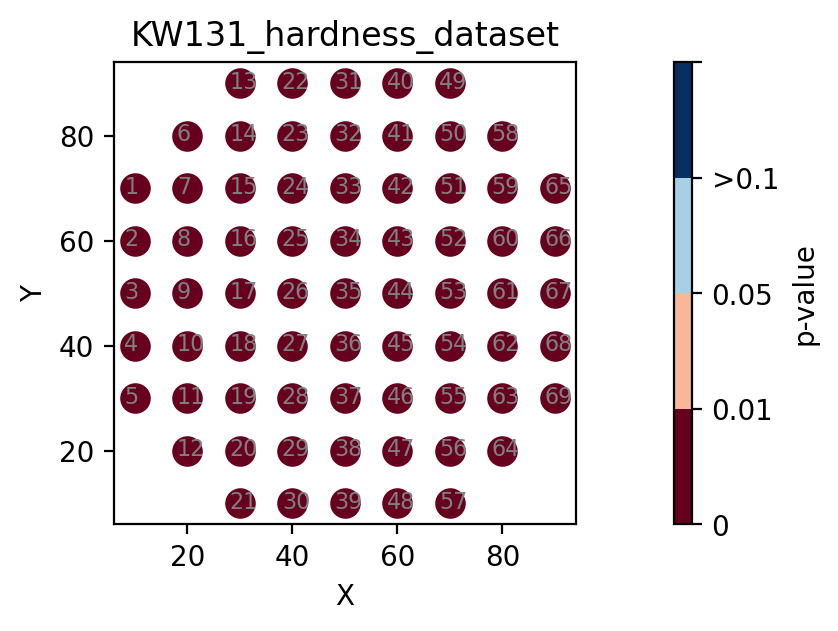

In [183]:
# Create the scatter contour plot AFTER regulation

fig, (ax1, ax2) = plt.subplots(figsize = (4, 3),
                          ncols = 2, gridspec_kw={'width_ratios': [3, 0.1]}, dpi=200)

# plot the fixed intervals
cmap = cm.RdBu(np.linspace(0, 1, 4))
 
c_0_01    = [i for i,v in enumerate(z_KW_new_Mahal) if v < 0.01]
c_0_05    = [i for i,v in enumerate(z_KW_new_Mahal) if v < 0.05 and v >= 0.01]
c_0_1     = [i for i,v in enumerate(z_KW_new_Mahal) if v < 0.1  and v >= 0.05]
c_abv_0_1 = [i for i,v in enumerate(z_KW_new_Mahal) if              v >= 0.1]

cax1 = ax1.scatter(coord_x[c_0_01],    coord_y[c_0_01],    color=cmap[0], s=400, marker='.') # ,vmin=0.2, vmax=0.6
cax2 = ax1.scatter(coord_x[c_0_05],    coord_y[c_0_05],    color=cmap[1], s=400, marker='.') # ,vmin=0.2, vmax=0.6
cax3 = ax1.scatter(coord_x[c_0_1],     coord_y[c_0_1],     color=cmap[2], s=400, marker='.') # ,vmin=0.2, vmax=0.6
cax4 = ax1.scatter(coord_x[c_abv_0_1], coord_y[c_abv_0_1], color=cmap[3], s=400, marker='.') # ,vmin=0.2, vmax=0.6

ax1.set_aspect('equal', 'box')
for i, txt in enumerate(index_conc_Mahal_new):
    ax1.annotate(txt, (coord_x[i]-2, coord_y[i]-1), color="grey", alpha=1, fontsize=8)
 
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_title(KW_name+'_'+PT_name) 


# customised colorbar: https://matplotlib.org/stable/tutorials/colors/colorbar_only.html

cmap = mpl.cm.RdBu
bounds = [0, 1, 2, 3, 4]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
             cax=ax2, orientation='vertical',  
             label="p-value")
cbar.ax.set_yticklabels(['0','0.01','0.05','>0.1',''])

  
# plt.savefig(KW_name+'_'+PT_name+'_Mahalanobis_pValue_lean_reg.png', bbox_inches='tight')
plt.show()

In [184]:
# # figure(figsize=(3.5, 3), dpi=200)

# fig, (ax1, ax2, ax3, ax4) = plt.subplots(figsize = (14, 3),
#                                     ncols = 4)

# # c_0_01 = [i for i,v in enumerate(z_KW_conc_Mahal_new) if v <0.01]
# # z_KW_conc_Mahal_new[c_0_01] = 0.01
# range1 = ax1.scatter(coord_x, coord_y, c=z_KW_conc_Mahal_new, s=400, marker='.', cmap='Greys_r',vmin=0.00, vmax=0.025) # ,vmin=0.2, vmax=0.6
# ax1.set_aspect('equal', 'box')
# for i, txt in enumerate(index_conc_Mahal_new):
#     ax1.annotate(txt, (coord_x[i]-2, coord_y[i]-1), color="grey", alpha=1, fontsize=8)
# fig.colorbar(range1, ax = ax1)

# range2 = ax2.scatter(coord_x, coord_y, c=z_KW_conc_Mahal_new, s=400, marker='.', cmap='Blues_r',vmin=0.025, vmax=0.05) # ,vmin=0.2, vmax=0.6
# ax2.set_aspect('equal', 'box')
# for i, txt in enumerate(index_conc_Mahal_new):
#     ax2.annotate(txt, (coord_x[i]-2, coord_y[i]-1), color="grey", alpha=1, fontsize=8)
# fig.colorbar(range2, ax = ax2)

# range3 = ax3.scatter(coord_x, coord_y, c=z_KW_conc_Mahal_new, s=400, marker='.', cmap='Greens_r',vmin=0.05, vmax=0.1) # ,vmin=0.2, vmax=0.6
# ax3.set_aspect('equal', 'box')
# for i, txt in enumerate(index_conc_Mahal_new):
#     ax3.annotate(txt, (coord_x[i]-2, coord_y[i]-1), color="grey", alpha=1, fontsize=8)
# fig.colorbar(range3, ax = ax3)

# range4 = ax4.scatter(coord_x, coord_y, c=z_KW_conc_Mahal_new, s=400, marker='.', cmap='coolwarm_r',vmin=0.1) # ,vmin=0.2, vmax=0.6
# ax4.set_aspect('equal', 'box')
# for i, txt in enumerate(index_conc_Mahal_new):
#     ax4.annotate(txt, (coord_x[i]-2, coord_y[i]-1), color="grey", alpha=1, fontsize=8)
# fig.colorbar(range4, ax = ax4)

# # cax1 = plt.scatter(coord_x, coord_y, c=z_KW_conc_Mahal_new, s=400, marker='.', cmap='RdBu',vmin=0.05) # ,vmin=0.2, vmax=0.6
# # plt.xlabel('X')
# # plt.ylabel('Y')
# # plt.title(KW_name)

# for i, txt in enumerate(index_conc_Mahal_new):
#     ax1.annotate(txt, (coord_x[i]-2, coord_y[i]-1), color="grey", alpha=1, fontsize=8)

# # plt.colorbar(cax1)
# plt.savefig(KW_name+'_Mahalanobis_pValue_corrosion_PT1.png', bbox_inches='tight')
# plt.show()
 
 

In [185]:
# z_KW_conc_Mahal_new_reg = np.empty((len(z_KW_conc_Mahal_new)))

# # Here we catogrise the p values into 4 level
# # cbar_ticks = np.linspace(np.nanmin(z_KW_conc_Mahal_new), np.nanmax(z_KW_conc_Mahal_new), 9)
# cbar_ticks = np.array([0, 0.025, 0.05, 0.1, 0.9])

# # for i, z in enumerate(z_KW_conc_Mahal_new):
# #     if z >= cbar_ticks[0] and z <= cbar_ticks[2]:
# #         z_KW_conc_Mahal_new_reg[i] = cbar_ticks[1]
# #     if z >= cbar_ticks[2] and z <= cbar_ticks[4]:
# #         z_KW_conc_Mahal_new_reg[i] = cbar_ticks[3]
# #     if z >= cbar_ticks[4] and z <= cbar_ticks[6]:
# #         z_KW_conc_Mahal_new_reg[i] = cbar_ticks[5]
# #     if z >= cbar_ticks[6] and z <= cbar_ticks[8]:
# #         z_KW_conc_Mahal_new_reg[i] = cbar_ticks[7]

# for i, z in enumerate(z_KW_conc_Mahal_new):
#     if z >= cbar_ticks[0] and z <= cbar_ticks[1]:
#         z_KW_conc_Mahal_new_reg[i] = (cbar_ticks[0]+cbar_ticks[1])/2
#     if z >= cbar_ticks[1] and z <= cbar_ticks[2]:
#         z_KW_conc_Mahal_new_reg[i] = (cbar_ticks[1]+cbar_ticks[2])/2
#     if z >= cbar_ticks[2] and z <= cbar_ticks[3]:
#         z_KW_conc_Mahal_new_reg[i] = (cbar_ticks[2]+cbar_ticks[3])/2
#     if z >= cbar_ticks[3] and z <= cbar_ticks[4]:
#         z_KW_conc_Mahal_new_reg[i] = (cbar_ticks[3]+cbar_ticks[4])/2
 

# # print(x, x.dtype, x.shape)
# # print(y, y.dtype, y.shape)
# # print(z_KW99, z_KW99.dtype, z_KW99.shape)